<a href="https://colab.research.google.com/github/sergiocalazans/imersao_dados_com_python_alura_2025/blob/main/Imers%C3%A3o_dados_com_Python_Alura_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 1 - Análise de Dados com Pandas


## Importação da Biblioteca

In [1]:
import pandas as pd

## Importação da base de dados

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

## Impressão dos 5 primeiros itens do Dataframe

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


## Detalhes da base de dados

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


## Estatística Descritiva da base de dados
### Obs: só é considerado dados númericos

In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


## Tamanho da base de dados
### Retorno: tupla -> (quantidade de linhas, quantidade de colunas)

In [6]:
tamanho_df = df.shape
tamanho_df

(133349, 11)

## Unpacking das informações do tamanho do Dataframe


In [7]:
linhas, colunas = tamanho_df
print('Linhas: {}'.format(f"{linhas:,}".replace(',', '.')))
print('Colunas:', colunas)

Linhas: 133.349
Colunas: 11


## Colunas da Tabela

In [8]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

### Renomeando as colunas do DataFrame

In [9]:
# Dicionário de renomeação
colunas = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}

# Aplicando renomeação
df.rename(columns=colunas, inplace=True)

# Verificando resultado
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


### Analisando quais sãos as categorias das colunas categóricas

#### Nível de senioridade

In [10]:
# O método .value_counts() serve para contar quantas vezes cada valor único aparece em uma coluna.
df['senioridade'].value_counts()

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


| Sigla | Significado | Descrição                                 |
|-------|-------------|--------------------------------------------|
| SE    | Senior      | Profissional experiente (nível sênior)     |
| MI    | Mid         | Nível intermediário                        |
| EN    | Entry       | Iniciante ou júnior (entry-level)          |
| EX    | Executive   | Executivo, liderança sênior (C-Level)      |


#### Tipo de contrato

In [11]:
df['contrato'].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


| Sigla | Significado  | Descrição                                                           |
|-------|--------------|----------------------------------------------------------------------|
| FT    | Full-time    | Tempo integral – trabalho padrão de 40h/semana ou período completo   |
| PT    | Part-time    | Meio período – carga horária reduzida                                |
| CT    | Contract     | Contrato temporário ou por projeto – geralmente por prazo determinado|
| FL    | Freelance    | Freelancer – trabalho autônomo ou por demanda, sem vínculo formal    |


#### Regime de trabalho

In [12]:
df['remoto'].value_counts()

,count
remoto,
0,105312
100,27718
50,319


O modelo remoto permite trabalhar de qualquer lugar sem precisar ir à empresa. O modelo presencial exige ir até o escritório todos os dias. O híbrido mistura os dois modelos. O modelo 'everywhere' é mais raro e permite trabalhar de qualquer lugar do mundo sem restrição de país ou cidade.

| Sigla | Significado |
|-------|-------------|
| 0     | Presencial  |
| 100   | Remoto      |
| 50    | Híbrido     |

#### Tamanho da empresa

In [13]:
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
M,129561
L,3574
S,214


| Sigla | Significado  | Descrição                                                           |
|-------|--------------|----------------------------------------------------------------------|
| M   | Medium    | Empresa de tamanho médio|
| L    | Large    | Empresa de tamanho grande                                |
| S    | Small    | Empresa de tamanho pequeno|


### Modificando o nome das categorias:

In [14]:
senioridade = {
    'SE': 'senior',
    'MI': 'pleno',
    'EN': 'junior',
    'EX': 'executivo'
}
df['senioridade'] = df['senioridade'].replace(senioridade)
df['senioridade'].value_counts()

,count
senioridade,
senior,77241
pleno,40465
junior,12443
executivo,3200


In [15]:
contrato = {
    'FT': 'integral',
    'PT': 'parcial',
    'CT': 'contrato',
    'FL': 'freelancer'
}
df['contrato'] = df['contrato'].replace(contrato)
df['contrato'].value_counts()

,count
contrato,
integral,132563
contrato,394
parcial,376
freelancer,16


In [16]:
tamanho_empresa = {
    'L': 'grande',
    'S': 'pequena',
    'M':	'media'

}
df['tamanho_empresa'] = df['tamanho_empresa'].replace(tamanho_empresa)
df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
media,129561
grande,3574
pequena,214


In [17]:
mapa_trabalho = {
    0: 'presencial',
    100: 'remoto',
    50: 'hibrido'
}

df['remoto'] = df['remoto'].replace(mapa_trabalho)
df['remoto'].value_counts()

,count
remoto,
presencial,105312
remoto,27718
hibrido,319


In [18]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025.0,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025.0,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025.0,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025.0,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


Podemos também resumir as informações categóricas com o método `describe()`, exibindo a quantidade de categorias únicas, qual é categoria mais frequente e sua respectiva frequência:

In [19]:
df.describe(include='object')

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,senior,integral,Data Scientist,USD,US,presencial,US,media
freq,77241,132563,17314,126140,119579,105312,119641,129561


Com isso já conseguimos responder algumas perguntas, como:

* Qual o nível de experiência mais comum na base de dados?
* Qual é o tipo de contrato mais frequente?
* Qual o cargo mais frequente na amostra?
* De qual país são a maioria dos profissionais da base?
* Qual é o país onde mais empresas da amostra estão sediadas?
* Qual o regime de trabalho mais comum?
* Qual é o tamanho mais comum das empresas na amostra?

**O código é um passo a passo para entender, limpar e preparar a base de dados para análises mais profundas, facilitando a visualização de padrões e tendências no mercado de trabalho em ciência de dados.**

# Aula 2 - Tratamento de dados

In [20]:
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [21]:
valores_faltantes = df.isnull()
valores_faltantes.sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [22]:
anos = df['ano'].unique()
anos

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [23]:
df[valores_faltantes.any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,senior,integral,Product Manager,184500,USD,184500,US,presencial,US,media
59692,NaN,pleno,integral,Engineer,110000,USD,110000,DE,presencial,DE,media
59710,NaN,junior,integral,Data Scientist,208800,USD,208800,US,presencial,US,media
59759,NaN,senior,integral,Software Engineer,135000,USD,135000,US,presencial,US,media
59789,NaN,senior,integral,Engineer,112000,USD,112000,US,presencial,US,media
131000,NaN,senior,integral,Machine Learning Engineer,163800,USD,163800,US,presencial,US,media
131006,NaN,senior,integral,Data Analytics Manager,204500,USD,204500,US,presencial,US,media
133054,NaN,junior,integral,Data Scientist,40000,USD,40000,JP,remoto,MY,grande
133281,NaN,pleno,integral,Machine Learning Engineer,180000,PLN,46597,PL,remoto,PL,grande
133317,NaN,pleno,integral,Data Scientist,130000,USD,130000,US,hibrido,US,grande


#### 1. Preenchimento com Valores Derivados (Imputation)
Para salario: Usar a mediana ou média do salário da mesma categoria, senioridade e país.

#### 2. Remover Linhas com Dados Faltantes
Caso a quantidade de dados nulos seja muito pequena (como neste caso, apenas 5 linhas), você pode simplesmente removê-las.

#### 3. Inferência e Preenchimento com Regras de Negócio
Preencher com base em regras claras.

## Exemplos fictícios

### Exemplo de preenchimento com média e mediana

In [24]:
import numpy as np

df_salarios = pd.DataFrame({
    'nome': ["Ana", "Bruno", "Carlos", "Maria", "Val"],
    'salarios': [4000, np.nan, 5000, np.nan, 100000]
})

# Adiciona a coluna salario_media com a substituição dos valores nulos dos salários pela média salarial arredondada
df_salarios['salario_media'] = df_salarios['salarios'].fillna(df_salarios['salarios'].mean().round(2))

# Adiciona a coluna salario_media com a substituição dos valores nulos dos salários pela mediana salarial
df_salarios['salario_mediana'] = df_salarios['salarios'].fillna(df_salarios['salarios'].median())

df_salarios

,nome,salarios,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Maria,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


### Exemplo de preenchimento com o valor anterior

In [25]:
df_temperaturas = pd.DataFrame({
    'dia': ['Seg', 'Ter', 'Qua', 'Qui', 'Sex'],
    'temperatura': [30, np.nan, np.nan, 28, 27]
})

df_temperaturas['preenchido_ffill'] = df_temperaturas['temperatura'].ffill()

df_temperaturas

,dia,temperatura,preenchido_ffill
0,Seg,30.0,30.0
1,Ter,NaN,30.0
2,Qua,NaN,30.0
3,Qui,28.0,28.0
4,Sex,27.0,27.0


### Exemplo de preenchimento com o valor posterior

In [26]:
df_temperaturas = pd.DataFrame({
    'dia': ['Seg', 'Ter', 'Qua', 'Qui', 'Sex'],
    'temperatura': [30, np.nan, np.nan, 28, 27]
})

df_temperaturas['preenchido_bfill'] = df_temperaturas['temperatura'].bfill()

df_temperaturas

,dia,temperatura,preenchido_bfill
0,Seg,30.0,30.0
1,Ter,NaN,28.0
2,Qua,NaN,28.0
3,Qui,28.0,28.0
4,Sex,27.0,27.0


### Exemplo de preenchimento com valor fixo

In [27]:
df_cidades = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Diana', 'Eduardo'],
    'cidade': ['São Paulo', np.nan, 'Curitiba', np.nan, 'Salvador']
})

df_cidades['cidade_corrigida'] = df_cidades['cidade'].fillna('Não informado')

df_cidades

,nome,cidade,cidade_corrigida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não informado
2,Carlos,Curitiba,Curitiba
3,Diana,NaN,Não informado
4,Eduardo,Salvador,Salvador


## Tratando o nosso DataFrame

### Removendo os dados nulos

In [28]:
df_tratado = df.dropna()

In [29]:
df_tratado.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


### Alterando o tipo de dados

In [30]:
df_tratado.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025.0,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025.0,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025.0,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025.0,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


In [31]:
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [32]:
df_tratado = df_tratado.assign(ano = df_tratado['ano'].astype('int64'))
df_tratado

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media
...,...,...,...,...,...,...,...,...,...,...,...
133344,2020,senior,integral,Data Scientist,412000,USD,412000,US,remoto,US,grande
133345,2021,pleno,integral,Principal Data Scientist,151000,USD,151000,US,remoto,US,grande
133346,2020,junior,integral,Data Scientist,105000,USD,105000,US,remoto,US,pequena
133347,2020,junior,contrato,Business Data Analyst,100000,USD,100000,US,remoto,US,grande


# Aula 3 - Visualização de dados



In [33]:
df_tratado.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media
1,2025,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media
2,2025,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media
3,2025,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media
4,2025,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media


## Gráfico de nível de senioridade

<Axes: title={'center': 'Gráfico de nível senioridade'}, xlabel='Senioridade', ylabel='Qtde de pessoas'>

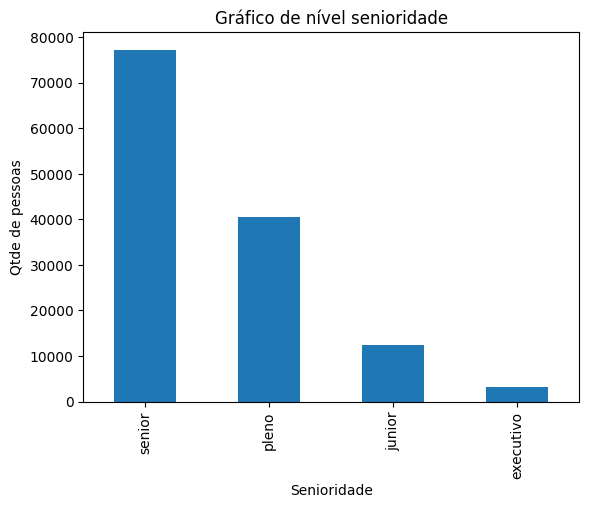

In [36]:
df_tratado['senioridade'].value_counts().plot.bar(title='Gráfico de nível senioridade', xlabel='Senioridade', ylabel='Qtde de pessoas')

## Salários em reais (R$)

In [55]:
df_tratado['salario_reais'] = df_tratado['usd'] * 5.43
df_tratado

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa,brl,salario_reais
0,2025,senior,integral,Solutions Engineer,214000,USD,214000,US,remoto,US,media,1162020.00,1162020.00
1,2025,senior,integral,Solutions Engineer,136000,USD,136000,US,remoto,US,media,738480.00,738480.00
2,2025,pleno,integral,Data Engineer,158800,USD,158800,AU,presencial,AU,media,862284.00,862284.00
3,2025,pleno,integral,Data Engineer,139200,USD,139200,AU,presencial,AU,media,755856.00,755856.00
4,2025,junior,integral,Data Engineer,90000,USD,90000,US,presencial,US,media,488700.00,488700.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133344,2020,senior,integral,Data Scientist,412000,USD,412000,US,remoto,US,grande,2237160.00,2237160.00
133345,2021,pleno,integral,Principal Data Scientist,151000,USD,151000,US,remoto,US,grande,819930.00,819930.00
133346,2020,junior,integral,Data Scientist,105000,USD,105000,US,remoto,US,pequena,570150.00,570150.00
133347,2020,junior,contrato,Business Data Analyst,100000,USD,100000,US,remoto,US,grande,543000.00,543000.00


## Importando bibliotecas para gráficos

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

## Gráfico de barras com seaborn

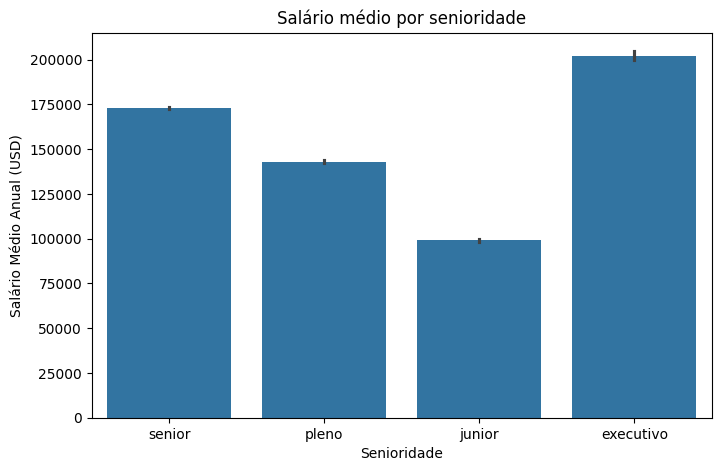

In [67]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_tratado, x='senioridade', y='usd')
plt.title('Salário médio por senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário Médio Anual (USD)')
plt.show()

In [70]:
ordem = df_tratado.groupby('senioridade')['usd'].mean().sort_values(ascending=False).index
ordem

Index(['executivo', 'senior', 'pleno', 'junior'], dtype='object', name='senioridade')

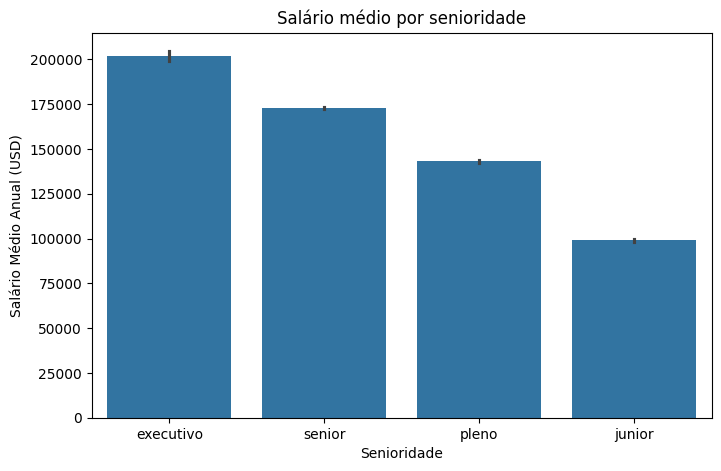

In [71]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_tratado, x='senioridade', y='usd', order=ordem)
plt.title('Salário médio por senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário Médio Anual (USD)')
plt.show()

## Gráfico distribuição salarial anual

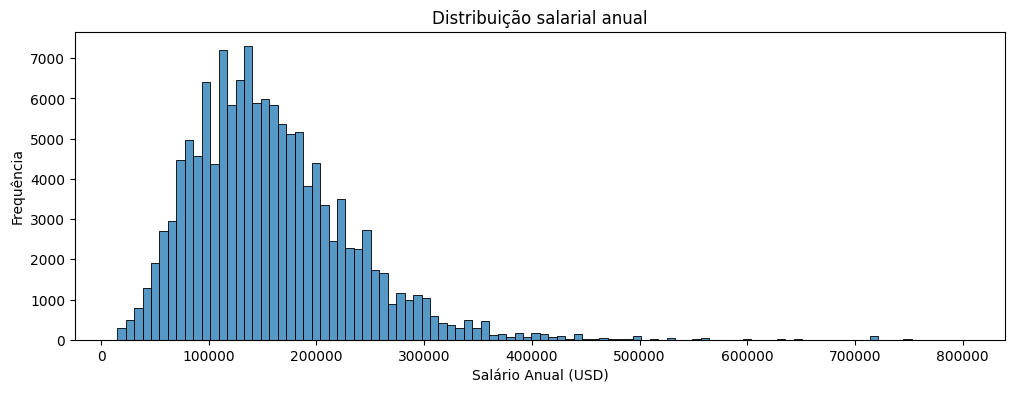

In [79]:
plt.figure(figsize=(12, 4))
sns.histplot(data=df_tratado['usd'], bins=100, kde=False)
plt.title('Distribuição salarial anual')
plt.xlabel('Salário Anual (USD)')
plt.ylabel('Frequência')
plt.show()

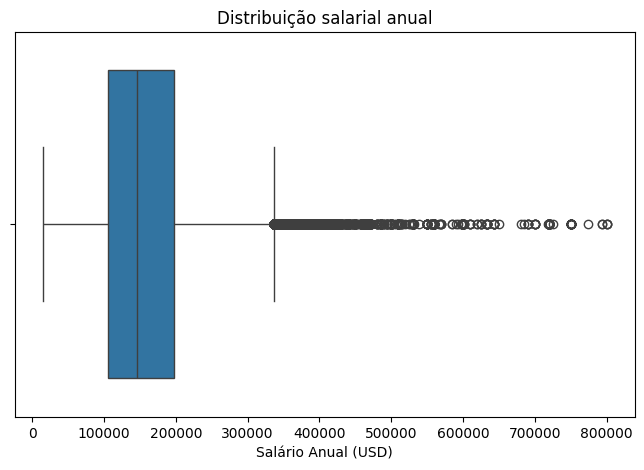

In [81]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_tratado['usd'])
plt.title('Distribuição salarial anual')
plt.xlabel('Salário Anual (USD)')
plt.show()

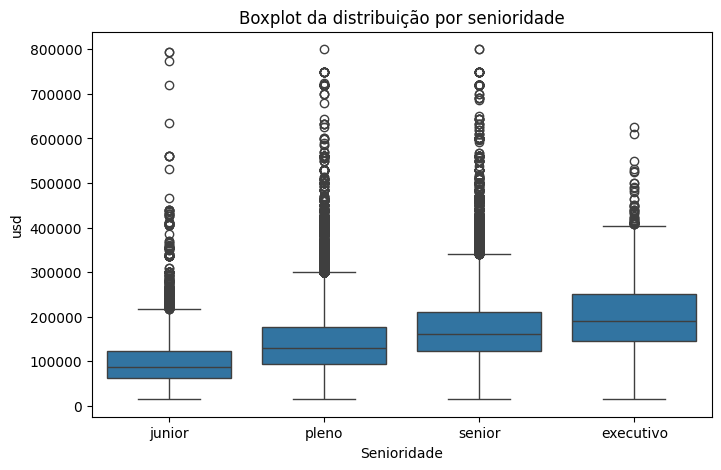

In [85]:
ordem_senioridade = ['junior', 'pleno', 'senior', 'executivo']

plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data=df_tratado, order=ordem_senioridade)
plt.title("Boxplot da distribuição por senioridade")
plt.xlabel("Senioridade")
plt.show()

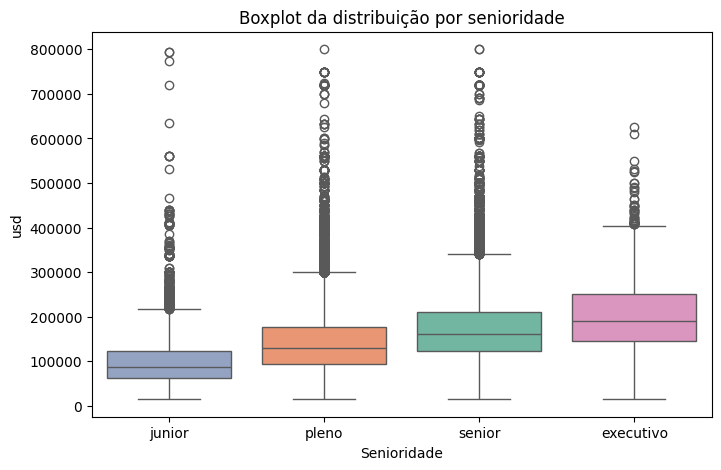

In [86]:
ordem_senioridade = ['junior', 'pleno', 'senior', 'executivo']

plt.figure(figsize=(8,5))
sns.boxplot(x='senioridade', y='usd', data=df_tratado, order=ordem_senioridade, palette='Set2', hue='senioridade')
plt.title("Boxplot da distribuição por senioridade")
plt.xlabel("Senioridade")
plt.show()


## Gráfico dinâmicos

In [87]:
import plotly.express as px

In [89]:
# prompt: Crie um gráfico de média salarial por senioridade em barras usando o plotly

senioridade_media_salario = df_tratado.groupby('senioridade')['usd'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(senioridade_media_salario,
             x='senioridade',
             y='usd',
             title='Média Salarial por Senioridade',
             labels={'senioridade': 'Nível de Senioridade', 'usd': 'Média Salarial Anual (USD)'})

fig.show()

In [91]:
remoto_contagem = df_tratado['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho'

          )

fig.show()

In [92]:
remoto_contagem = df_tratado['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5
          )

fig.show()


In [93]:
remoto_contagem = df_tratado['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['tipo_trabalho', 'quantidade']

fig = px.pie(remoto_contagem,
             names='tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5
          )
fig.update_traces(textinfo='percent+label')
fig.show()

In [97]:
df_data_scientist = df_tratado[df_tratado['cargo'] == 'Data Scientist'].copy()

salario_medio_por_pais = df_data_scientist.groupby('empresa')['usd'].mean().sort_values(ascending=False).reset_index()

# Dicionário para traduzir as siglas dos países para nomes em português brasileiro
traducao_paises = {
    'US': 'Estados Unidos',
    'SG': 'Singapura',
    'BG': 'Bulgária',
    'CH': 'Suíça',
    'EG': 'Egito',
    'CA': 'Canadá',
    'MX': 'México',
    'NZ': 'Nova Zelândia',
    'JP': 'Japão',
    'IL': 'Israel',
    'AU': 'Austrália',
    'CZ': 'República Tcheca',
    'IT': 'Itália',
    'DZ': 'Argélia',
    'KR': 'Coreia do Sul',
    'RU': 'Rússia',
    'FR': 'França',
    'DE': 'Alemanha',
    'IE': 'Irlanda',
    'PT': 'Portugal',
    'NO': 'Noruega',
    'SE': 'Suécia',
    'GB': 'Reino Unido',
    'UA': 'Ucrânia',
    'PL': 'Polônia',
    'BR': 'Brasil',
    'NL': 'Holanda',
    'CL': 'Chile',
    'BE': 'Bélgica',
    'HK': 'Hong Kong',
    'LT': 'Lituânia',
    'LV': 'Letônia',
    'ID': 'Indonésia',
    'AD': 'Andorra',
    'AT': 'Áustria',
    'KE': 'Quênia',
    'NG': 'Nigéria',
    'EE': 'Estônia',
    'TR': 'Turquia',
    'ES': 'Espanha',
    'ZA': 'África do Sul',
    'FI': 'Finlândia',
    'GR': 'Grécia',
    'IN': 'Índia',
    'LU': 'Luxemburgo',
    'RO': 'Romênia',
    'AR': 'Argentina',
    'SK': 'Eslováquia',
    'TH': 'Tailândia',
    'HU': 'Hungria',
    'TW': 'Taiwan',
    'EC': 'Equador'
}

# Substituir as siglas pelos nomes dos países
salario_medio_por_pais['empresa'] = salario_medio_por_pais['empresa'].replace(traducao_paises)

fig = px.bar(salario_medio_por_pais,
             x='empresa',
             y='usd',
             title='Média Salarial para Data Scientists por País',
             labels={'empresa': 'País', 'usd': 'Média Salarial Anual (USD)'},
             color='usd',
             color_continuous_scale='Viridis')

fig.update_layout(xaxis_tickangle=-45)

fig.show()

In [101]:
!pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 10.1 MB/s eta 0:00:00


In [102]:
import pycountry

# Função para converter ISO-2 para ISO-3
def iso2_to_iso3(code):
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# Criar nova coluna com código ISO-3
df_tratado['residencia_iso3'] = df_tratado['residencia'].apply(iso2_to_iso3)

# Calcular média salarial por país (ISO-3)
df_ds = df_tratado[df_tratado['cargo'] == 'Data Scientist']
media_ds_pais = df_ds.groupby('residencia_iso3')['usd'].mean().reset_index()

# Gerar o mapa
fig = px.choropleth(media_ds_pais,
                    locations='residencia_iso3',
                    color='usd',
                    color_continuous_scale='rdylgn',
                    title='Salário médio de Cientista de Dados por país',
                    labels={'usd': 'Salário médio (USD)', 'residencia_iso3': 'País'})

fig.show()



In [103]:
df_tratado.to_csv('dados-imersao-final.csv', index=False)